In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

### 数据生成

In [2]:
def rotate_rect_dimensions(length, width, angle_degrees):
    # 将角度转换为弧度
    angle_radians = np.radians(angle_degrees)

    # 计算旋转后的外切矩形的长和宽
    rotated_length = abs(length * np.cos(angle_radians)) + abs(width * np.sin(angle_radians))
    rotated_width = abs(length * np.sin(angle_radians)) + abs(width * np.cos(angle_radians))

    return rotated_length, rotated_width

In [3]:
rotated_length, rotated_width = rotate_rect_dimensions(393, 69, 0)
rotated_length, rotated_width

(393.0, 69.0)

In [4]:
"""
改变量：
长度L：50~700
宽度W: 50~700
宽度缺口比例α：0~1-γ
长度缺口比例β：0~1
位置比例γ：0~1
周期Px：100~900
周期Py：100~900
旋转角度φ：0~360
"""

'\n改变量：\n长度L：50~700\n宽度W: 50~700\n宽度缺口比例α：0~1-γ\n长度缺口比例β：0~1\n位置比例γ：0~1\n周期Px：100~900\n周期Py：100~900\n旋转角度φ：0~360\n'

### 数据过滤

In [5]:
import pandas as pd
import random

# Set the random seed for reproducibility
random.seed(42)

# Number of data points
num_data_points = 5000000



# Number of segments for each variable
num_segments = 10

# Define the ranges for each parameter
L_range = (50, 700)
W_range = (50, 700)
alpha_range = (0, 1)
beta_range = (0, 1)
gama_range = (0, 1)
phi_range = (0, 360)
px_range = (100, 900)
py_range = (100, 900)

# Generate random data
data = {
    'L': [],
    'W': [],
    'alpha': [],
    'beta': [],
    'gama': [],
    'phi': [],
    'Px': [],
    'Py': [],
}

# Generate remaining random data
for _ in range(num_data_points):
    data['L'].append(random.randint(*L_range))
    data['W'].append(random.randint(*W_range))
    data['alpha'].append(round(random.random(),3))
    data['beta'].append(round(random.random(),3))
    data['gama'].append(round(random.random(),3))
    data['phi'].append(random.randint(*phi_range))
    data['Px'].append(random.randint(*px_range))
    data['Py'].append(random.randint(*py_range))


# Create a DataFrame
df = pd.DataFrame(data)


In [6]:
df

,L,W,alpha,beta,gama,phi,Px,Py
0,164,75,0.742,0.245,0.140,52,792,858
1,608,139,0.590,0.032,0.094,119,617,716
2,77,624,0.199,0.650,0.545,112,559,703
3,334,56,0.759,0.160,0.423,142,259,320
4,394,154,0.093,0.097,0.847,309,370,144
...,...,...,...,...,...,...,...,...
4999995,530,562,0.565,0.057,0.396,62,657,646
4999996,636,129,0.988,0.516,0.499,269,832,805
4999997,185,528,0.935,0.269,0.483,75,385,762
4999998,602,434,0.429,0.737,0.507,66,151,633


### 数据过滤

In [7]:
import pandas as pd
import numpy as np

def rotate_rect_dimensions(length, width, angle_degrees):
    # 将角度转换为弧度
    angle_radians = np.radians(angle_degrees)

    # 计算旋转后的外切矩形的长和宽
    rotated_length = abs(length * np.cos(angle_radians)) + abs(width * np.sin(angle_radians))
    rotated_width = abs(length * np.sin(angle_radians)) + abs(width * np.cos(angle_radians))

    return rotated_length, rotated_width

def filter_data(df):
    """
    过滤数据的函数。

    参数：
    df (DataFrame): 包含原始数据的DataFrame。

    返回：
    DataFrame: 过滤后的DataFrame。
    """
    # 定义过滤条件
    def condition1(df):
        return df['W'] <= df['Px']

    def condition2(df):
        return df['L'] <= df['Py']

    def condition3(df):
        # 计算旋转后的矩形尺寸
        df['rotated_length'], df['rotated_width'] = zip(*df.apply(lambda row: rotate_rect_dimensions(row['L'], row['W'], row['phi']), axis=1))

        # 添加过滤条件
        return (df['rotated_length'] <= df['Py']) & (df['rotated_width'] <= df['Px'])

    def condition4(df):
        return df['alpha'] <= 1 - df['gama']

    # 使用逻辑与连接所有过滤条件
    combined_condition = pd.Series(True, index=df.index)
    for condition in [condition1,condition2,condition3,condition4]:
        combined_condition = combined_condition & condition(df)

    # 根据过滤条件进行筛选
    filtered_df = df[combined_condition]

    return filtered_df

# 读取数据
# df = pd.read_csv('random_data_with_segments.csv')

# 使用函数过滤数据
filtered_df = filter_data(df)

# 打印过滤前后的数据数量
print(f"过滤前的数据数量: {len(df)}")
print(f"过滤后的数据数量: {len(filtered_df)}")

# 如果需要保存过滤后的数据，可以使用以下代码
# filtered_df.to_csv('filtered_data.csv', index=False)


过滤前的数据数量: 5000000
过滤后的数据数量: 727958


In [8]:
filtered_df = filtered_df[['L','W','alpha','beta','gama','phi','Px','Py']]

### 先从数据中sample 20万条

In [9]:
filtered_df

,L,W,alpha,beta,gama,phi,Px,Py
0,164,75,0.742,0.245,0.140,52,792,858
1,608,139,0.590,0.032,0.094,119,617,716
7,153,439,0.278,0.636,0.365,189,463,314
15,61,167,0.682,0.537,0.267,328,448,214
16,350,495,0.158,0.003,0.722,134,612,880
...,...,...,...,...,...,...,...,...
4999951,135,227,0.097,0.576,0.677,147,587,457
4999956,116,253,0.243,0.503,0.423,148,656,574
4999980,55,146,0.115,0.310,0.872,336,761,799
4999982,422,414,0.221,0.314,0.148,241,605,838


In [10]:
### 先从数据中sample 20万条
data_35w = filtered_df.sample(n=350000, random_state=42)


### 绘图

array([[<Axes: title={'center': 'L'}>, <Axes: title={'center': 'W'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'gama'}>,
        <Axes: title={'center': 'phi'}>],
       [<Axes: title={'center': 'Px'}>, <Axes: title={'center': 'Py'}>,
        <Axes: >]], dtype=object)

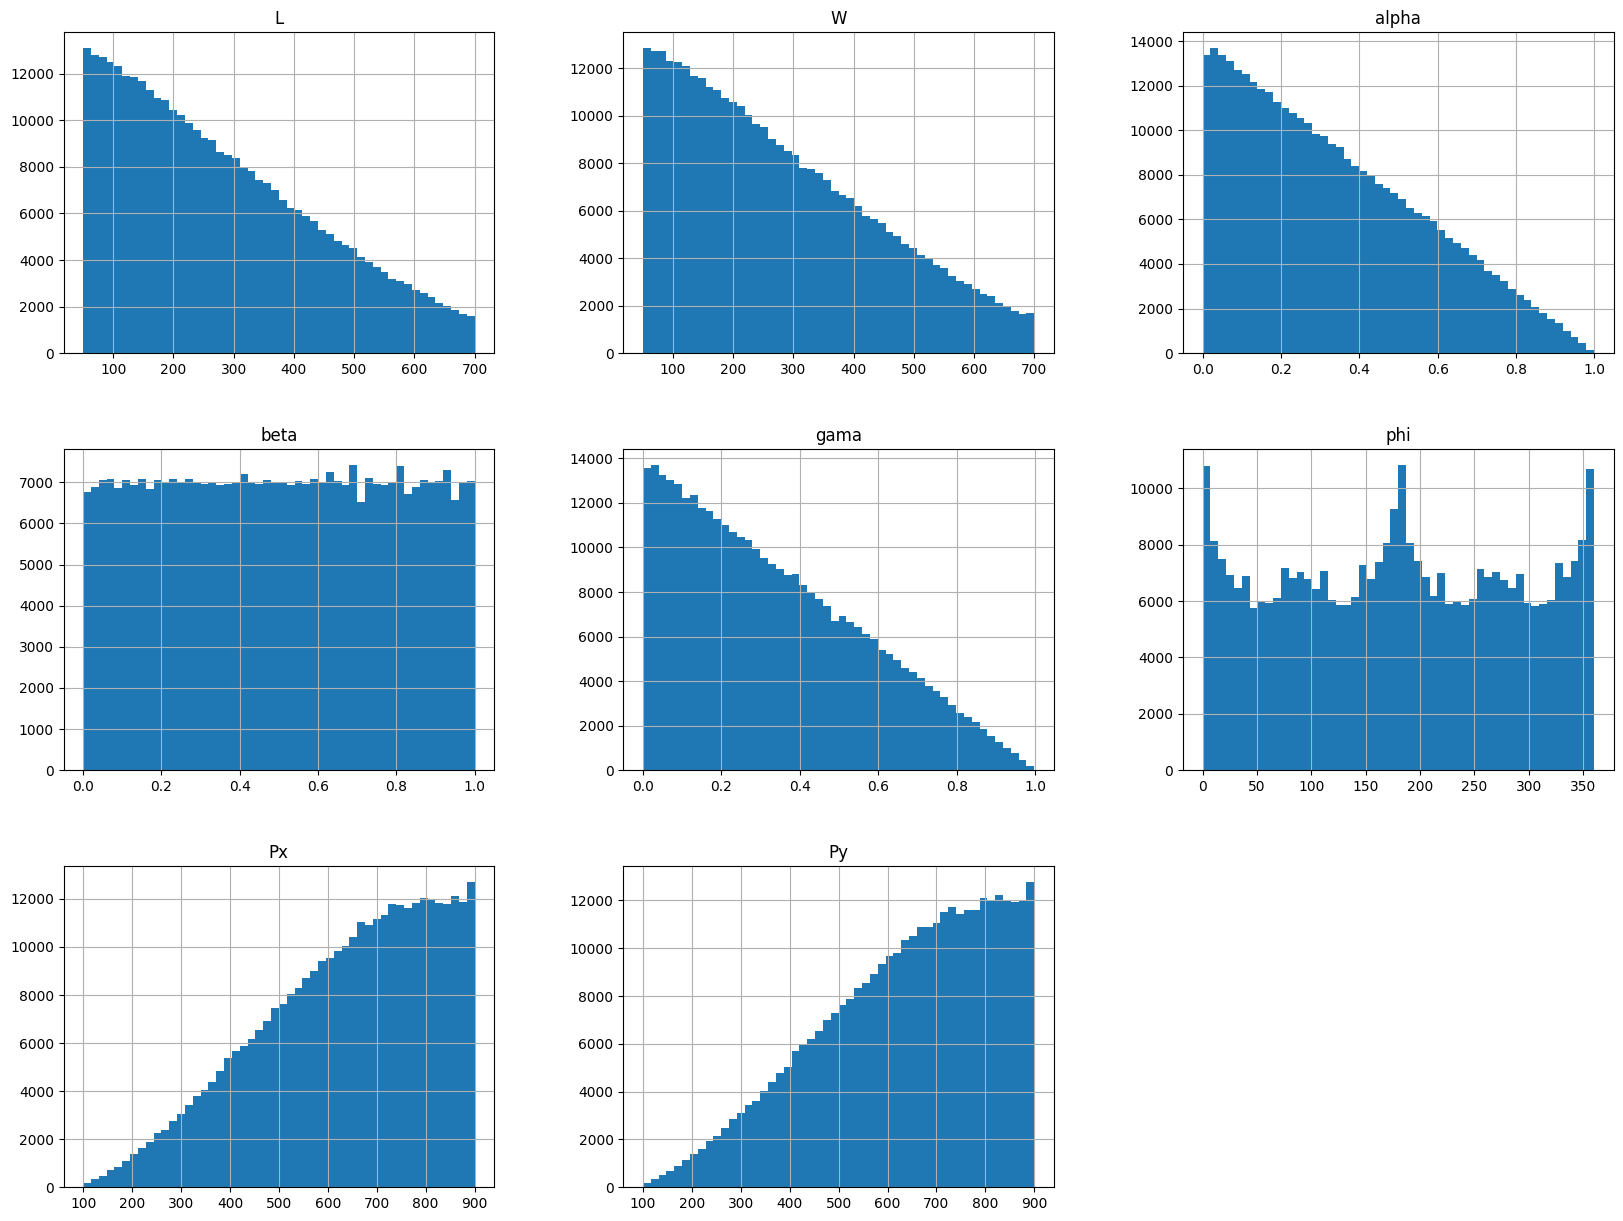

In [11]:
data_35w.hist(bins=50, figsize=(20, 15))


In [12]:
data_35w.insert(0, 'Pic', None)
data_35w.insert(0, 'type', "lack_rec")

In [13]:
# 将索引重置为从0开始的连续整数
data_35w.reset_index(drop=True, inplace=True)
data_35w

,type,Pic,L,W,alpha,beta,gama,phi,Px,Py
0,lack_rec,None,181,398,0.800,0.343,0.149,144,744,516
1,lack_rec,None,127,252,0.147,0.256,0.733,32,881,898
2,lack_rec,None,410,367,0.136,0.955,0.254,174,675,766
3,lack_rec,None,87,146,0.379,0.617,0.163,191,296,186
4,lack_rec,None,288,60,0.473,0.305,0.043,147,741,449
...,...,...,...,...,...,...,...,...,...,...
349995,lack_rec,None,97,564,0.414,0.240,0.465,136,648,675
349996,lack_rec,None,186,439,0.603,0.215,0.081,27,797,472
349997,lack_rec,None,61,135,0.527,0.217,0.113,332,332,658
349998,lack_rec,None,259,469,0.136,0.664,0.312,164,807,489


In [14]:
from tqdm import tqdm
for i in tqdm(range(len(data_35w))):
    W = data_35w.iloc[i]['W']
    L = data_35w.iloc[i]['L']
    alpha = data_35w.iloc[i]['alpha']
    beta = data_35w.iloc[i]['beta']
    gama = data_35w.iloc[i]['gama']
    phi = data_35w.iloc[i]['phi']
    Px = data_35w.iloc[i]['Px']
    Py = data_35w.iloc[i]['Py']
    #W1=50=L1=106=W2=190=L2=662=phi=0=Px=370=Py=680.png
    pic_name = f'W={W}=L={L}=alpha={alpha}=beta={beta}=gama={gama}=phi={phi}=Px={Px}=Py={Py}.png'
    data_35w.loc[i,"Pic"] = pic_name

100%|██████████| 350000/350000 [01:23<00:00, 4202.17it/s]


In [15]:
data_35w

,type,Pic,L,W,alpha,beta,gama,phi,Px,Py
0,lack_rec,W=398=L=181=alpha=0.8=beta=0.343=gama=0.149=ph...,181,398,0.800,0.343,0.149,144,744,516
1,lack_rec,W=252=L=127=alpha=0.147=beta=0.256=gama=0.733=...,127,252,0.147,0.256,0.733,32,881,898
2,lack_rec,W=367=L=410=alpha=0.136=beta=0.955=gama=0.254=...,410,367,0.136,0.955,0.254,174,675,766
3,lack_rec,W=146=L=87=alpha=0.379=beta=0.617=gama=0.163=p...,87,146,0.379,0.617,0.163,191,296,186
4,lack_rec,W=60=L=288=alpha=0.473=beta=0.305=gama=0.043=p...,288,60,0.473,0.305,0.043,147,741,449
...,...,...,...,...,...,...,...,...,...,...
349995,lack_rec,W=564=L=97=alpha=0.414=beta=0.24=gama=0.465=ph...,97,564,0.414,0.240,0.465,136,648,675
349996,lack_rec,W=439=L=186=alpha=0.603=beta=0.215=gama=0.081=...,186,439,0.603,0.215,0.081,27,797,472
349997,lack_rec,W=135=L=61=alpha=0.527=beta=0.217=gama=0.113=p...,61,135,0.527,0.217,0.113,332,332,658
349998,lack_rec,W=469=L=259=alpha=0.136=beta=0.664=gama=0.312=...,259,469,0.136,0.664,0.312,164,807,489


In [16]:
data_35w.to_csv('lack_rec_35w.csv', index=False)

### 绘图

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import pandas as pd
import numpy as np
import matplotlib.transforms as transforms
# import cv2
import math
from tqdm import tqdm


In [7]:
data = pd.read_csv('lack_rec_35w.csv')

C:\Users\Kieron-Yee\AppData\Local\Temp\ipykernel_8428\2286250209.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('lack_rec_35w.csv')


,type,Pic,L,W,alpha,beta,gama,phi,Px,Py
0,double_rec,NaN,181.0,398.0,0.800,0.343,0.149,144.0,744.0,516.0
1,double_rec,NaN,127.0,252.0,0.147,0.256,0.733,32.0,881.0,898.0
2,double_rec,NaN,410.0,367.0,0.136,0.955,0.254,174.0,675.0,766.0
3,double_rec,NaN,87.0,146.0,0.379,0.617,0.163,191.0,296.0,186.0
4,double_rec,W1=225.0=L1=67.0=alpha=0.364=beta=0.37=gama=0....,288.0,60.0,0.473,0.305,0.043,147.0,741.0,449.0
...,...,...,...,...,...,...,...,...,...,...
675504,NaN,W1=564.0=L1=97.0=alpha=0.414=beta=0.24=gama=0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675505,NaN,W1=439.0=L1=186.0=alpha=0.603=beta=0.215=gama=...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675506,NaN,W1=135.0=L1=61.0=alpha=0.527=beta=0.217=gama=0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675507,NaN,W1=469.0=L1=259.0=alpha=0.136=beta=0.664=gama=...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
